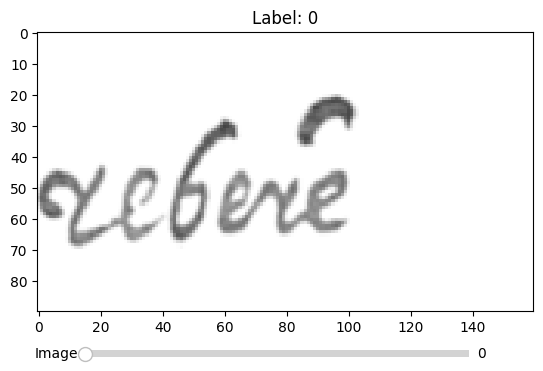

In [1]:
"""
.. module:: image_viewer
   :platform: Linux, Windows
   :synopsis: Example code for viewing the dataset in Assignment 3

.. moduleauthor:: Fredrik Nysjo
"""

from load_mnist import load_mnist_words, load_mnist_labels

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP


# Load the image stack
images = load_mnist_words("Esposalles-bgr-images")
assert images is not None, "Could not load image stack"
n_images = images.shape[0]

# Load the label data
labels = load_mnist_labels("Esposalles-bgr-labels")
assert labels is not None, "Could not load labels"
n_labels = labels.shape[0]
assert n_images == n_labels

# Generate subsampled smaller version of the dataset
n_skip = 20
images_small = images[::n_skip]
labels_small = labels[::n_skip]

# Create lookup table with randomized colors for the unique labels. Feel free to
# change this if you prefer other colors!
np.random.seed(2345)
n_unique_labels = len(np.unique(labels))
color_lut = np.random.rand(n_unique_labels, 3) * 0.8 + 0.1

# Create a figure for inspecting the image and label data
plt.figure()
image_plot = plt.imshow(np.transpose(images[0,:,:]), cmap="gray", vmin=0, vmax=255)
label_text = plt.title("Label: " + str(int(labels[0])))

# Add a slider for scrolling through the dataset
slider_rect = plt.axes([0.20, 0.1, 0.60, 0.03])
slider = widgets.Slider(slider_rect, "Image", 0, n_images-1, valinit=0, valfmt="%d")
def slider_callback(val):
    label_text.set_text("Label: " + str(labels[int(val)]))
    image_plot.set_data(np.transpose(images[int(val),:,:]))
slider.on_changed(slider_callback)

plt.show()

In [4]:
transformer = PCA(n_components=2)
proj = transformer.fit_transform(np.array([x.flatten() for x in images_small]))

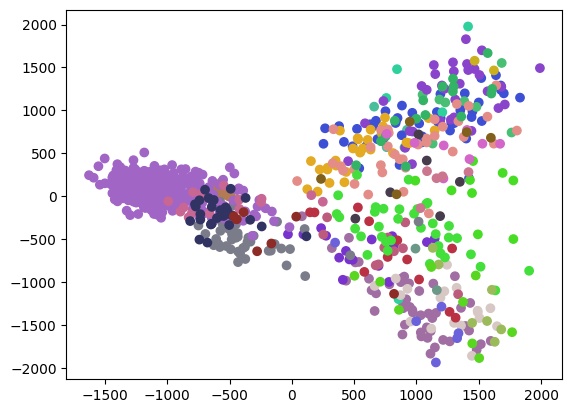

In [7]:
plt.figure()
plt.scatter(proj[:,0], proj[:,1], c=color_lut[labels_small])
plt.show()



In [22]:
transformer = TSNE(n_components=2,init ='pca', n_iter=5000)
proj = transformer.fit_transform(np.array([x.flatten() for x in images]))


c:\Users\johan\.conda\envs\vetvis\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\johan\.conda\envs\vetvis\lib\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


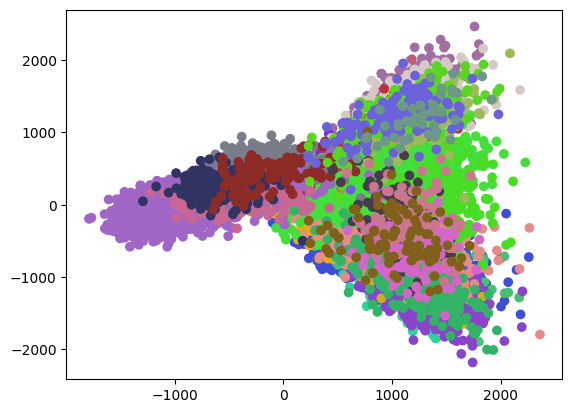

In [21]:
plt.figure()
plt.scatter(proj[:,0], proj[:,1], c=color_lut[labels])
plt.show()

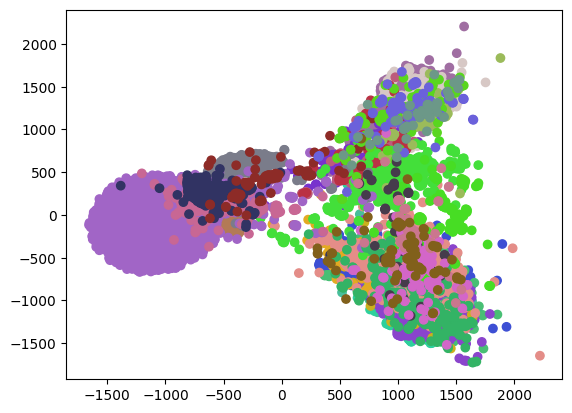

In [23]:
plt.figure()
plt.scatter(proj[:,0], proj[:,1], c=color_lut[labels])
plt.show()

In [25]:
transformer = TSNE(n_components=2,init ='random', n_iter=1000, random_state=0)
proj = transformer.fit_transform(np.array([x.flatten() for x in images]))

c:\Users\johan\.conda\envs\vetvis\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


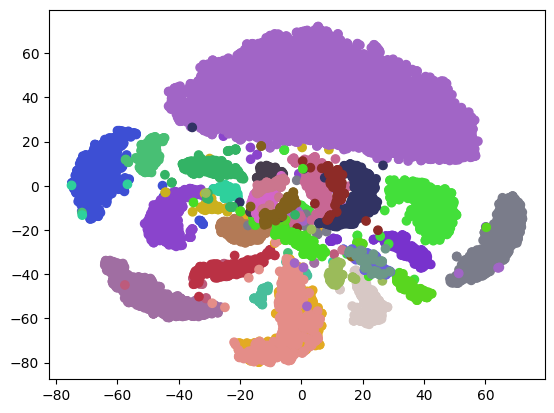

In [27]:
plt.figure()
plt.scatter(proj[:,0], proj[:,1], c=color_lut[labels])
plt.show()
